# Computational Efficiency

*Code to create Figure 3d in [Saliency Cards: A Framework to Characterize and Compare
Saliency Methods](https://arxiv.org/abs/2206.02958).*

Computational efficiency measureshow computationally intensive it is to produce the saliency map. Different methods vary widely in their computational efficiency. For example, perturbation-based methods are often more computationally intensive than simple gradient-based methods.

To illustrate computational efficiency, we time three common saliency methods: [guided backprop](https://arxiv.org/abs/1412.6806), [integrated gradients](https://arxiv.org/abs/1703.01365), [smoothgrad](https://arxiv.org/abs/1706.03825), and [LIME](https://arxiv.org/abs/1602.04938), showing that compute time can vary by orders of magnitude between saliency methods.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from interpretability_methods.util import visualize_saliency
from interpretability_methods.guided_backprop import GuidedBackprop
from interpretability_methods.integrated_gradients import IntegratedGradients
from interpretability_methods.lime import LIME
from interpretability_methods.vanilla_gradients import VanillaGradients
from util import imagenet_transform, load_model_from_pytorch, load_pil_image

## Load ImageNet Image and Pretrained ResNet50 Model
To time each saliency method, we compute the saliency of a ResNet50 model on an ImageNet (3, 224, 244) image.

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_model_from_pytorch('resnet50', True, device).eval()

We select an image to evaluate.

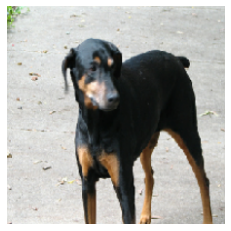

In [4]:
image_path = './resources/doberman.png'
image = load_pil_image(image_path)

model_transform = imagenet_transform(normalize=True)
display_transform = imagenet_transform(normalize=False)

image_input = model_transform(image)
plt.imshow(display_transform(image).numpy().transpose(1, 2, 0))
plt.axis('off');

In [5]:
image_batch = image_input.unsqueeze(0).to(device)
print(image_batch.shape)

torch.Size([1, 3, 224, 224])


## Time Saliency Methods
We time [guided backprop](https://arxiv.org/abs/1412.6806), [integrated gradients](https://arxiv.org/abs/1703.01365), [smoothgrad](https://arxiv.org/abs/1706.03825), and [LIME](https://arxiv.org/abs/1602.04938). We use each method's default parameters and a public implementation. To achieve a consistent interface, we use the [interpretability-methods repo](https://github.com/aboggust/interpretability-methods) that wraps each implementation. 

### Guided Backprop
We use the [Captum](https://captum.ai/api/guided_backprop.html) implementation of guided backprop.

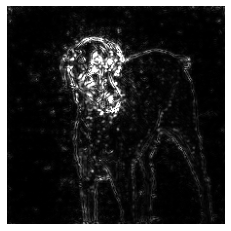

In [9]:
gb = GuidedBackprop(model)
gb_saliency = gb.get_saliency(image_batch)
visualize_saliency(gb_saliency);

In [10]:
%timeit gb.get_saliency(image_batch)

59.8 ms ± 305 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Integrated Gradients
We use the [Captum](https://captum.ai/api/guided_backprop.html) implementation of integrated gradients and its default parameters (baseline of random noise and 50 approximation steps).

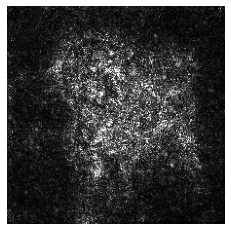

In [11]:
ig = IntegratedGradients(model)
ig_saliency = ig.get_saliency(image_batch)
visualize_saliency(ig_saliency);

In [12]:
%timeit ig.get_saliency(image_batch)

159 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### SmoothGrad
We implement SmoothGrad based on the [PAIR Saliency](https://github.com/PAIR-code/saliency) implementation and its default parameters (15% noise and 25 samples).

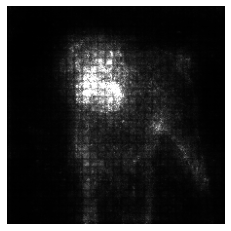

In [13]:
vg = VanillaGradients(model)
smoothgraph_saliency = vg.get_saliency_smoothed(image_batch)
visualize_saliency(smoothgraph_saliency);

In [14]:
%timeit vg.get_saliency_smoothed(image_batch)

1.52 s ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### LIME
We use [the author's LIME package](https://github.com/marcotcr/lime) and its default parameters on ImageNet images (1000 samples).

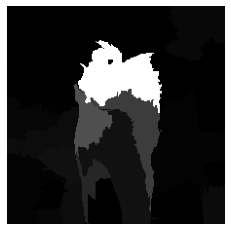

In [15]:
lime = LIME(model)
lime_saliency = lime.get_saliency(image_batch)
visualize_saliency(lime_saliency);

In [16]:
%timeit lime.get_saliency(image_batch)


12.7 s ± 35.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
